# **Library & data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.ticker import FuncFormatter

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign_data.csv to marketing_campaign_data.csv


In [ ]:
data = pd.read_csv("marketing_campaign_data.csv", delimiter = ',')

In [ ]:
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Setiap baris mencerminkan Satu Customer

# **Feature Engineering**

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

data['join_at_age'] = data['Dt_Customer'].dt.year - data['Year_Birth']
data['age'] = 2022 - data['Year_Birth']
data['total_kids'] = data['Kidhome'] + data['Teenhome']
data['is_parents'] = np.where(data['total_kids'] > 0, 1, 0)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1


In [ ]:
# age_range
def age_range(age):
    if age <= 12:
        return 'child'
    elif age <= 18:
        return 'teens'
    elif age <= 36:
        return 'young_adults'
    elif age <= 55:
        return 'middled_aged_adults'
    else:
        return 'older_adults'

In [ ]:
data['age_range'] = data['age'].apply(age_range)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults


In [ ]:
# amount spent
data['total_amount_spent'] = data['MntCoke'] \
                              + data['MntFruits'] \
                              + data['MntMeatProducts'] \
                              + data['MntFishProducts'] \
                              + data['MntSweetProducts'] \
                              + data['MntGoldProds']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000


In [ ]:
# accepted campaigns
data['total_accepted_campaign'] = data['AcceptedCmp1'] \
                                    + data['AcceptedCmp2'] \
                                    + data['AcceptedCmp3'] \
                                    + data['AcceptedCmp4'] \
                                    + data['AcceptedCmp5']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0


In [ ]:
# total transaction purchased
data['total_transaction'] = data['NumDealsPurchases'] \
                            + data['NumWebPurchases'] \
                            + data['NumCatalogPurchases'] \
                            + data['NumStorePurchases']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19


In [ ]:
# CVR --- conversion rate
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

data['cvr'] = data.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25,3.571429
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6,1.200000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21,5.250000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8,1.333333
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19,3.800000


# **Explatory Data Analysis**

### **Correlation Plot**

<Axes: >

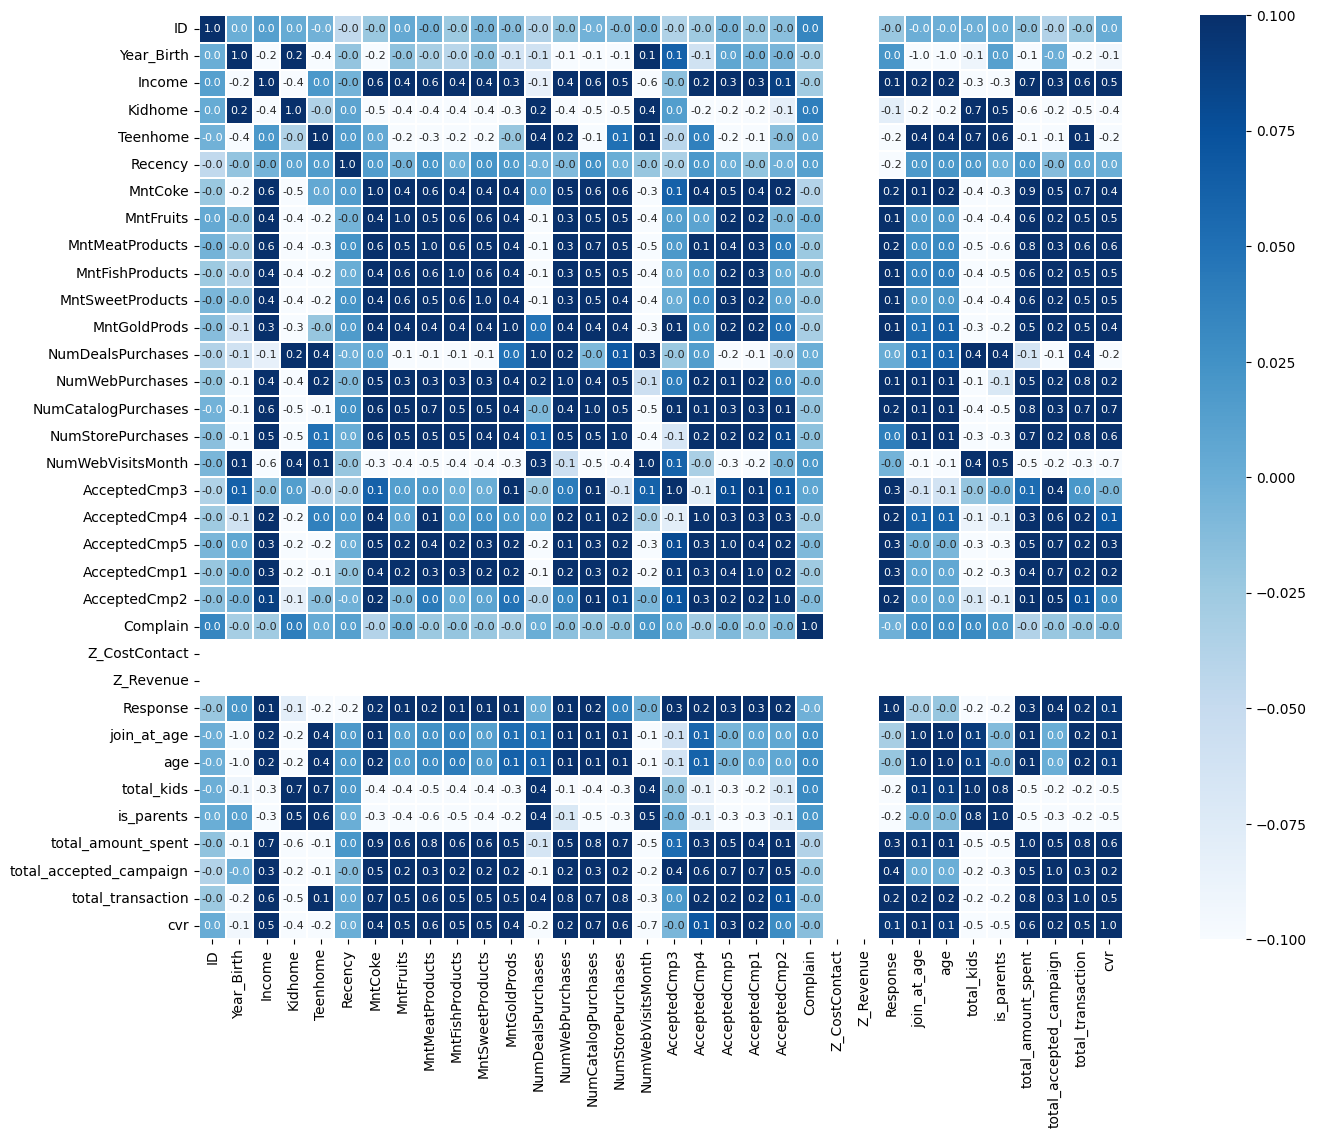

In [ ]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = data.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

### **Joint Plot**

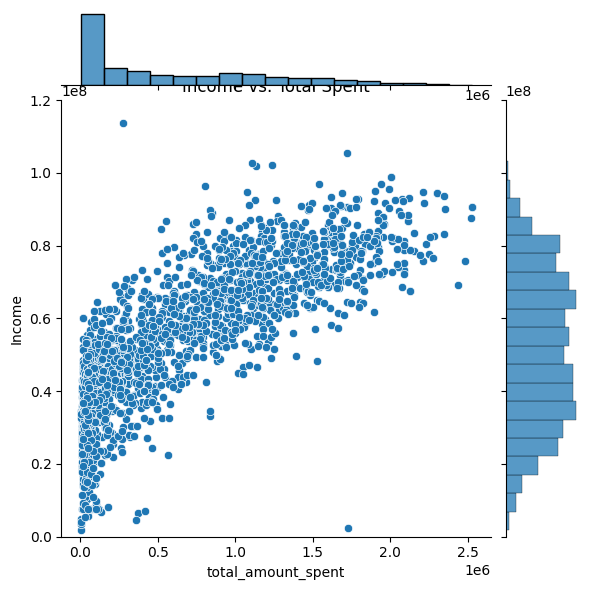

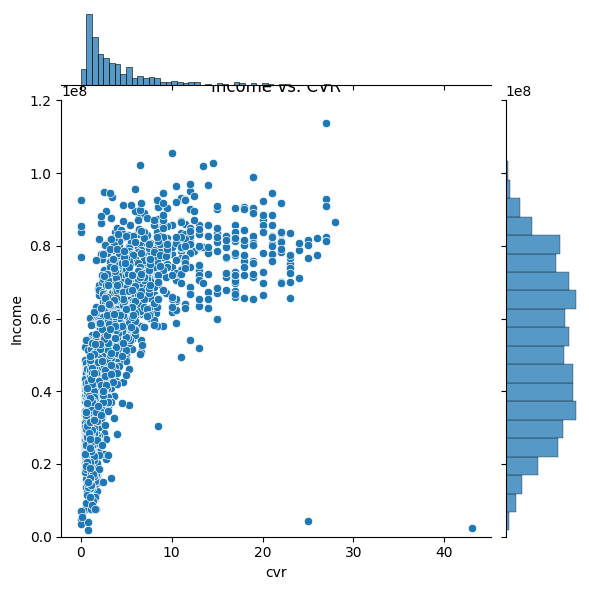

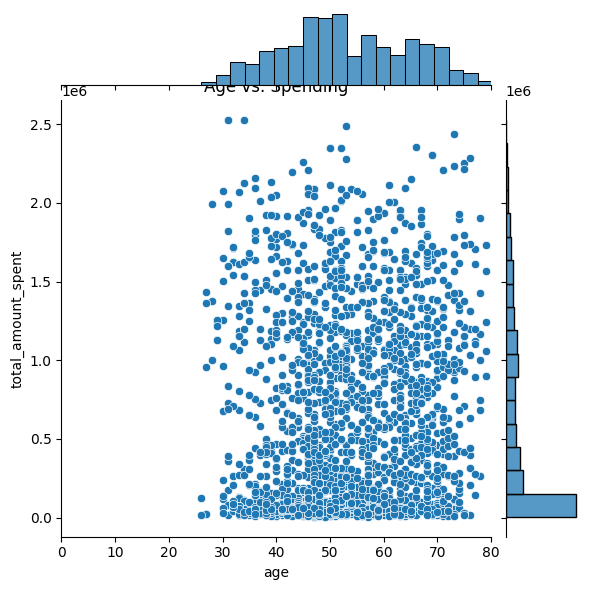

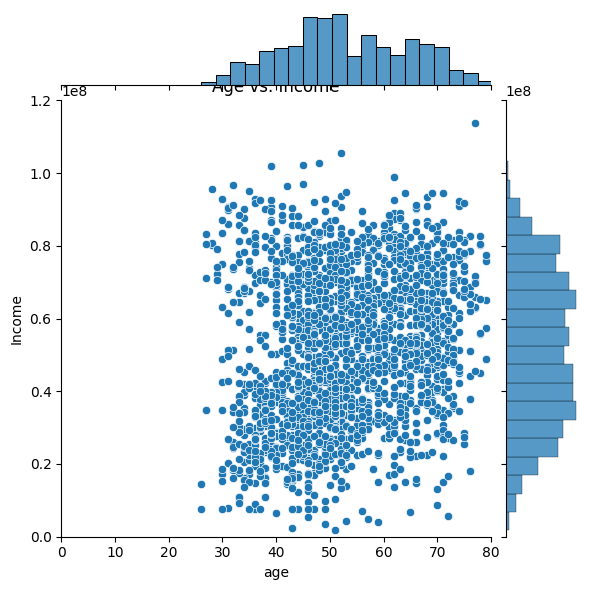

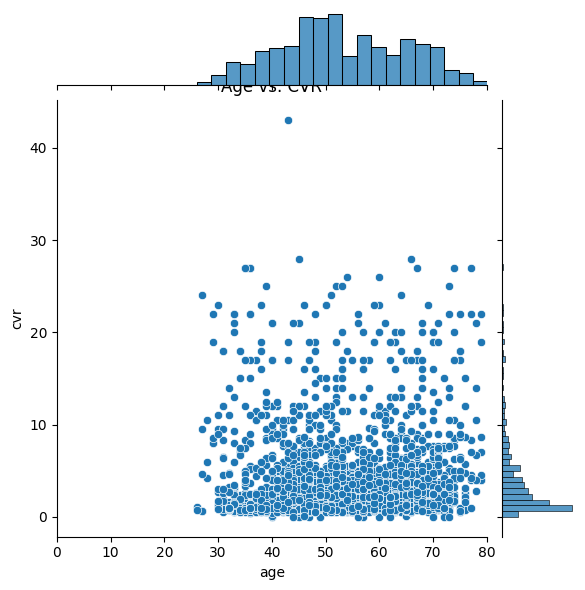

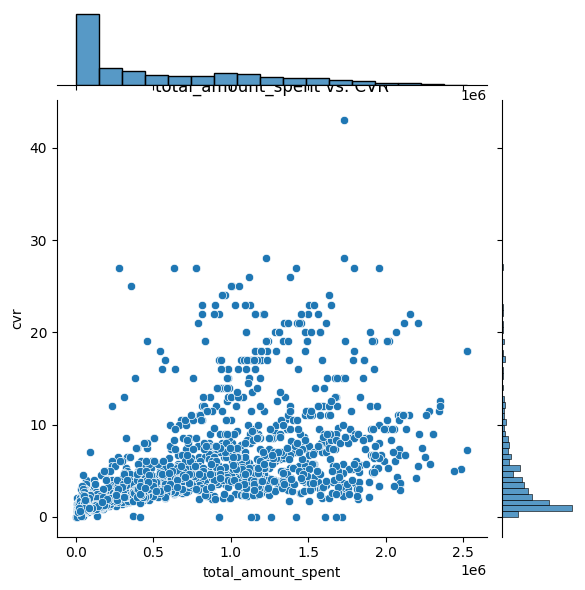

In [ ]:
plot = sns.jointplot(x=data["total_amount_spent"], y=data["Income"])
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

plot = sns.jointplot(x=data["cvr"], y=data["Income"])
plt.title('Income vs. CVR')
plot.ax_marg_y.set_ylim(0, 120000000)

plot = sns.jointplot(x=data["age"], y=data["total_amount_spent"])
plt.title('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=data["age"], y=data["Income"])
plt.title('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=data["age"], y=data["cvr"])
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=data["total_amount_spent"], y=data["cvr"])
plt.title('total_amount_spent vs. CVR')
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

# **Data Cleaning and Preprocessing**

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25,3.571429
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6,1.200000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21,5.250000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8,1.333333
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19,3.800000


In [ ]:
data.isna().sum()

ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
join_at_age                 0
age                         0
total_kids                  0
is_parents                  0
age_range 

### **Null Data**

In [ ]:
data = data.dropna()

### **Duplicate Data**

In [ ]:
data.duplicated().sum()

0

### **Feature Encoding**

In [ ]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

data['Education_mapped'] = data['Education'].map(mapping_education)

In [ ]:
data_cats = data[['Education']].copy()
# One hot encoder
for cat in ['Marital_Status', 'age_range', 'is_parents']:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data_cats = data_cats.join(onehots)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25,3.571429,2
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6,1.200000,2
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21,5.250000,2
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8,1.333333,2
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19,3.800000,4


### **Feature Standardization**

In [ ]:
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age', 'join_at_age', 'total_kids', 'total_amount_spent'
                      ]

categorical_features = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_range',
                        'total_accepted_campaign', 'Education_mapped'
                       ]

In [ ]:
data_scaled = data.copy()
ss = StandardScaler()

for col in numerical_features:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])

display(data_scaled.shape, data_scaled.head())

(2216, 39)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped
0,5524,1957,S1,Lajang,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,0.897752,0.986443,-1.264803,0,older_adults,1.675488,0,25,3.571429,2
1,2174,1954,S1,Lajang,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,0,1.313688,1.236801,1.405806,1,older_adults,-0.962358,0,6,1.200000,2
2,4141,1965,S1,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0,0.315443,0.318822,-1.264803,0,older_adults,0.280250,0,21,5.250000,2
3,6182,1984,S1,Bertunangan,-1.017239,1.039938,-0.928972,2014-10-02,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0.0,0.0,0,-1.181925,-1.266777,0.070501,1,middled_aged_adults,-0.919224,0,8,1.333333,2
4,5324,1981,S3,Menikah,0.240221,1.039938,-0.928972,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0.0,0.0,0,-0.932363,-1.016420,0.070501,1,middled_aged_adults,-0.307044,0,19,3.800000,4


# **K-Means Clustering**

### **Elbow Method**

[104357.21965506373, 77987.73445441775, 61652.36836583122, 55343.156383630136, 50312.12964007013, 46904.70089464342, 43896.02029590342, 41424.98383228289, 40017.362973949756, 38809.05267700291, 37629.417075887555, 36804.63151040448, 35881.145593858724, 35182.219068302846, 34450.105204043604, 33813.88775651713, 33257.33901476104, 32662.890141160482]


<Axes: title={'center': 'Elbow Method of K-means Clustering'}>

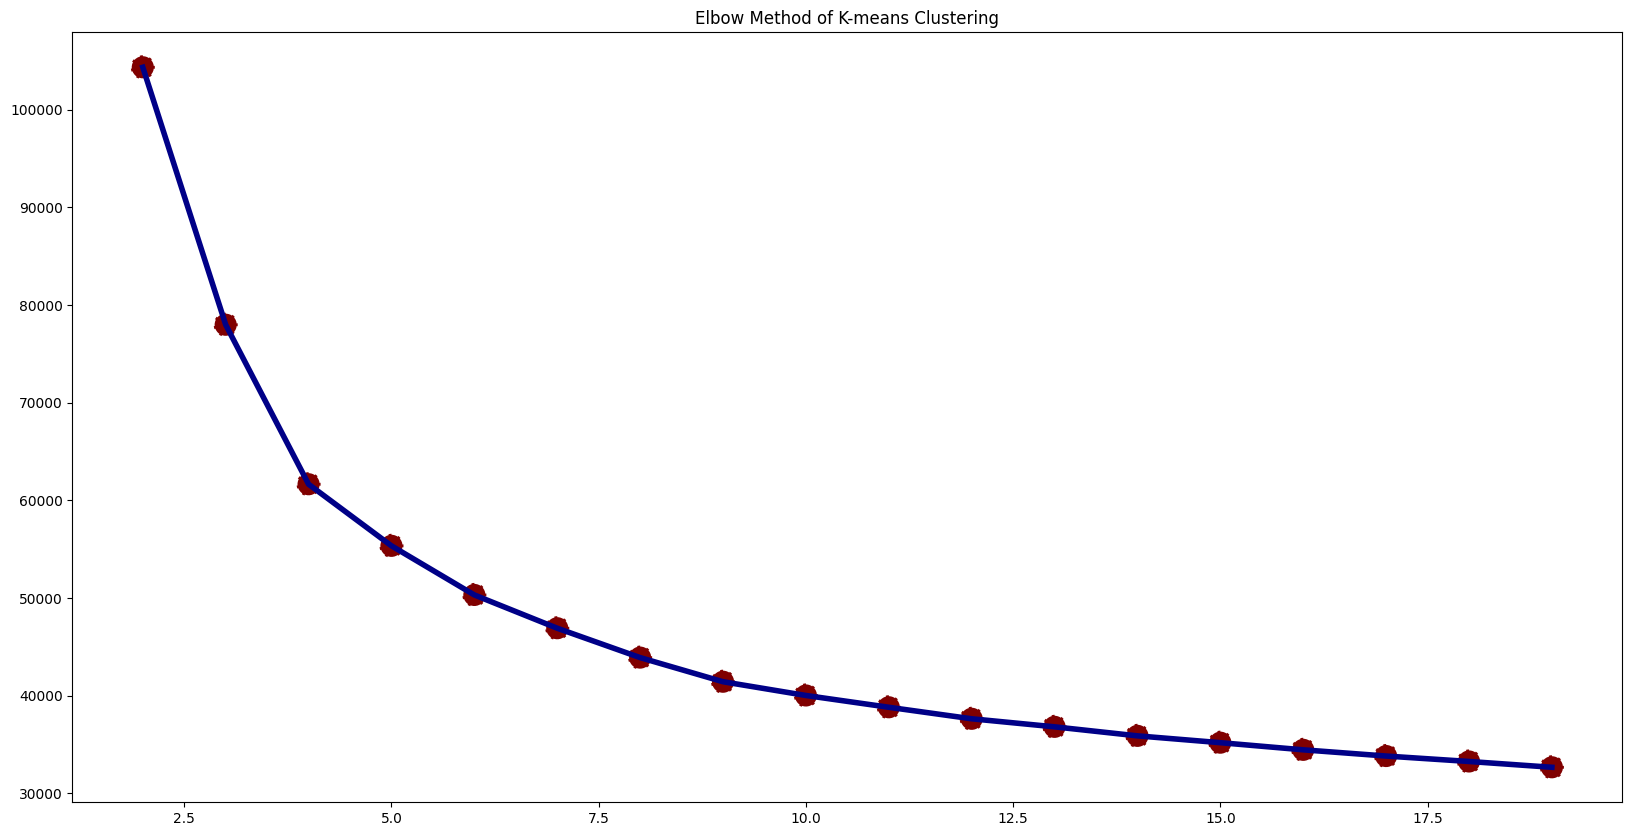

In [ ]:
from sklearn.cluster import KMeans
X = data_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
# X = data_scaled[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
data['cluster'] = kmeans.labels_

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped,cluster
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25,3.571429,2,2
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6,1.200000,2,1
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21,5.250000,2,2
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8,1.333333,2,1
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19,3.800000,4,0


### **Silhouette Score**

In [ ]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

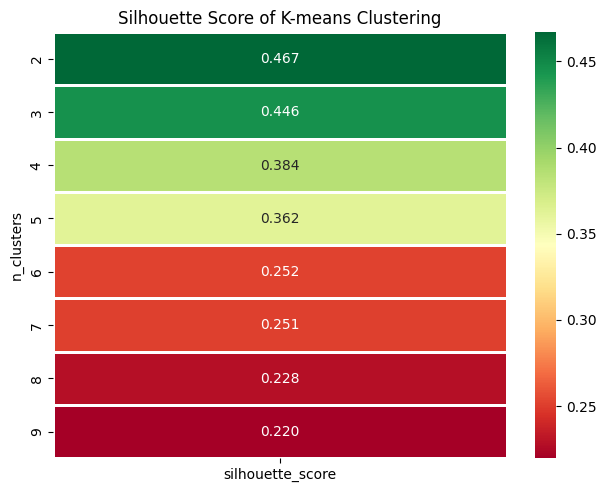

In [ ]:
visualize_silhouette_layer(X)

# **Customer Personality Analysis**

### **Clustering Visualization**

**User per Cluster**

In [ ]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

data['cluster_mapped'] = data['cluster'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mid Spender'),
  Text(1, 0, 'Risk of Churn'),
  Text(2, 0, 'Low Spender'),
  Text(3, 0, 'High Spender')])

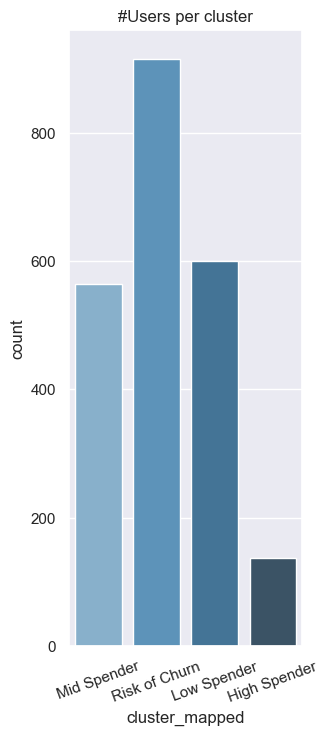

In [ ]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=data['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

**Predicted Purchased Price per Cluster**

Predicted Purchased Price = GMV (Total Amount Spent) / Total Transaction

In [ ]:
# Low Spender
data[data.cluster == 0].total_amount_spent.sum() / data[data.cluster == 0].total_transaction.sum()

43175.86276083467

Rp. 43.176

In [ ]:
# Risk of Churn
data[data.cluster == 1].total_amount_spent.sum() / data[data.cluster == 1].total_transaction.sum()

10708.224442736357

Rp. 10.708

In [ ]:
# Mid Spender
data[data.cluster == 2].total_amount_spent.sum() / data[data.cluster == 2].total_transaction.sum()

48304.363531281604

Rp. 48.304

In [ ]:
# High Spender
data[data.cluster == 3].total_amount_spent.sum() / data[data.cluster == 3].total_transaction.sum()

66372.04058624577

Rp. 66.372

**Product per Cluster**

In [ ]:
Product = data.groupby('cluster').agg({'MntCoke' : ['sum'],
                                       'MntFruits' : ['sum'],
                                       'MntMeatProducts' : ['sum'],
                                       'MntFishProducts' : ['sum'],
                                       'MntSweetProducts' : ['sum'],
                                       'MntGoldProds' : ['sum']})
Product = Product.reset_index(drop=True)
Product.columns = ['Coke','Fruits','Meat Products','Fish Products','Sweet Products','Gold Prods']
Product

,Coke,Fruits,Meat Products,Fish Products,Sweet Products,Gold Prods
0,228364000,17193000,109901000,24844000,17099000,32976000
1,27207000,3964000,16295000,5546000,4046000,12599000
2,350867000,27975000,181348000,39175000,28633000,40631000
3,69645000,9273000,62519000,13840000,10118000,11221000


- Cluster 0 paling banyak dibeli adalah coke diikuti dengan Meat Products dan paling sedikit adalah Sweet Products
- Cluster 1 paling banyak dibeli adalah coke diikuti dengan Meat Products dan paling sedikit adalah Fruits
- Cluster 2 paling banyak dibeli adalah coke diikuti dengan Meat Products dan paling sedikit adalah Sweet Products
- Cluster 3 paling banyak dibeli adalah coke diikuti dengan Meat Products dan paling sedikit adalah Sweet Products

**Age per Cluster**

Text(0.5, 1.0, 'Age per Cluster')

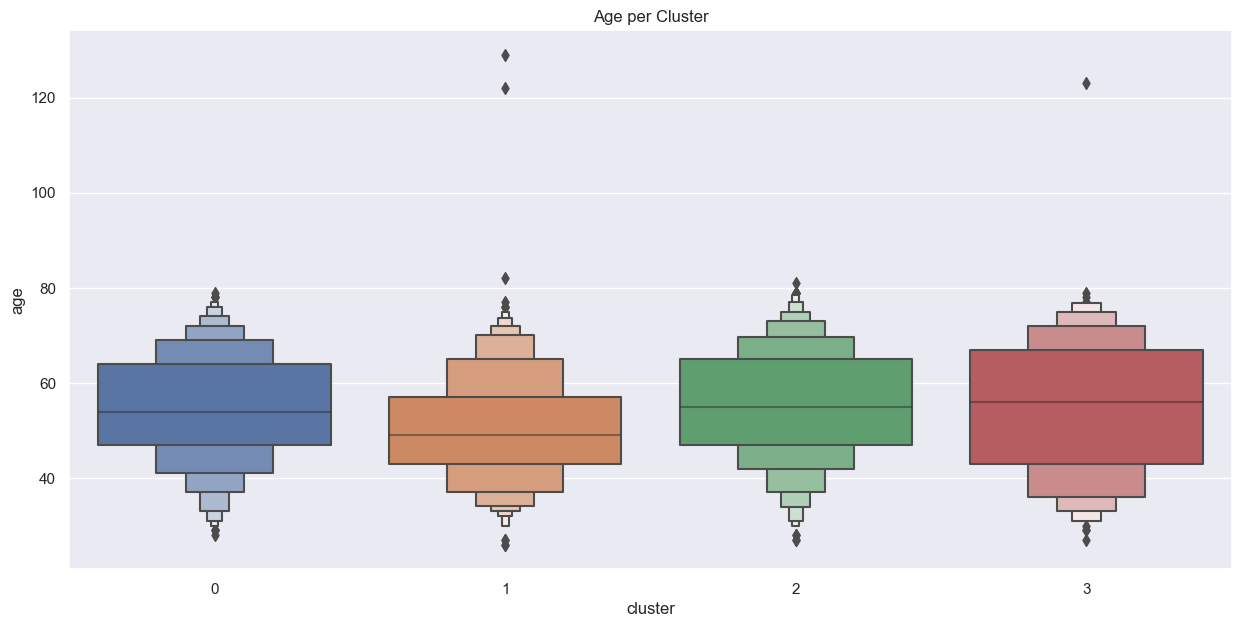

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['age'])
plt.title('Age per Cluster')

**Total Income per Cluster**

(0.0, 120000000.0)

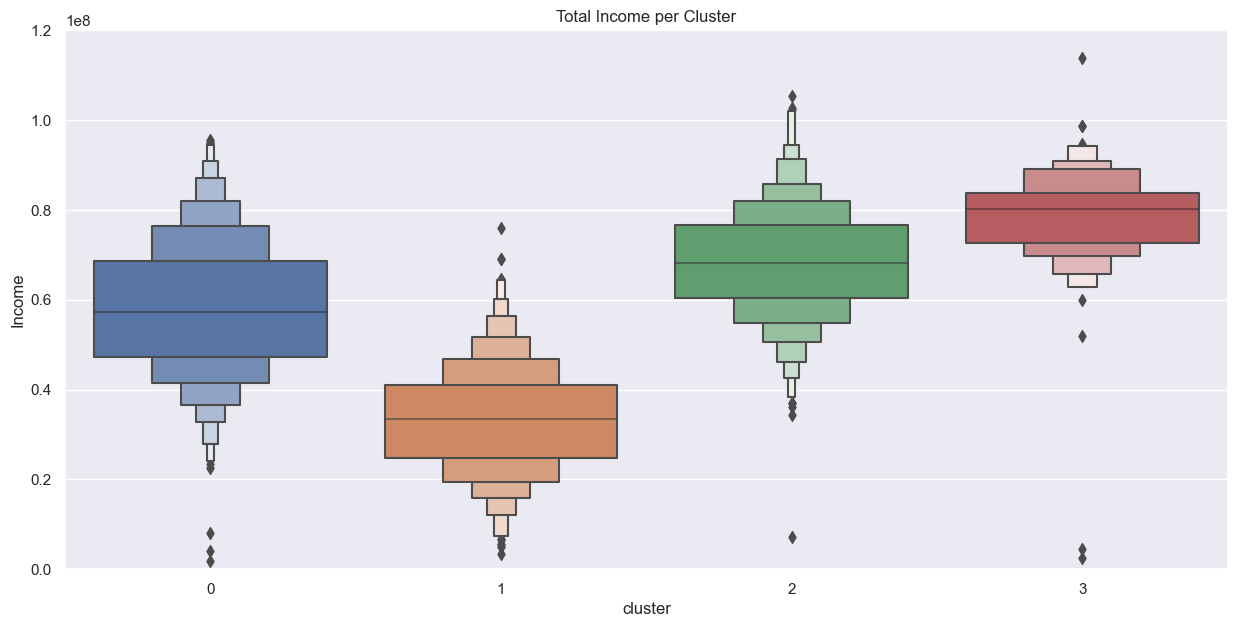

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

**Total Amount Spent per Cluster**

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

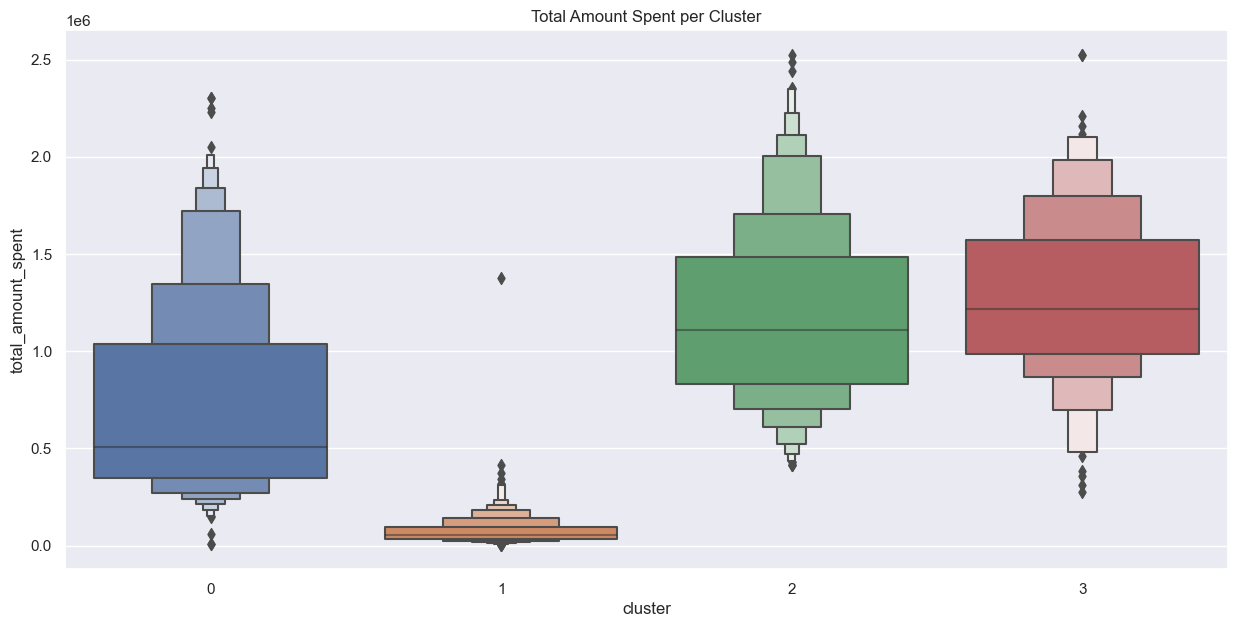

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

**Total Visit Web per Cluster**

Text(0.5, 1.0, 'Total Visit Web per Cluster')

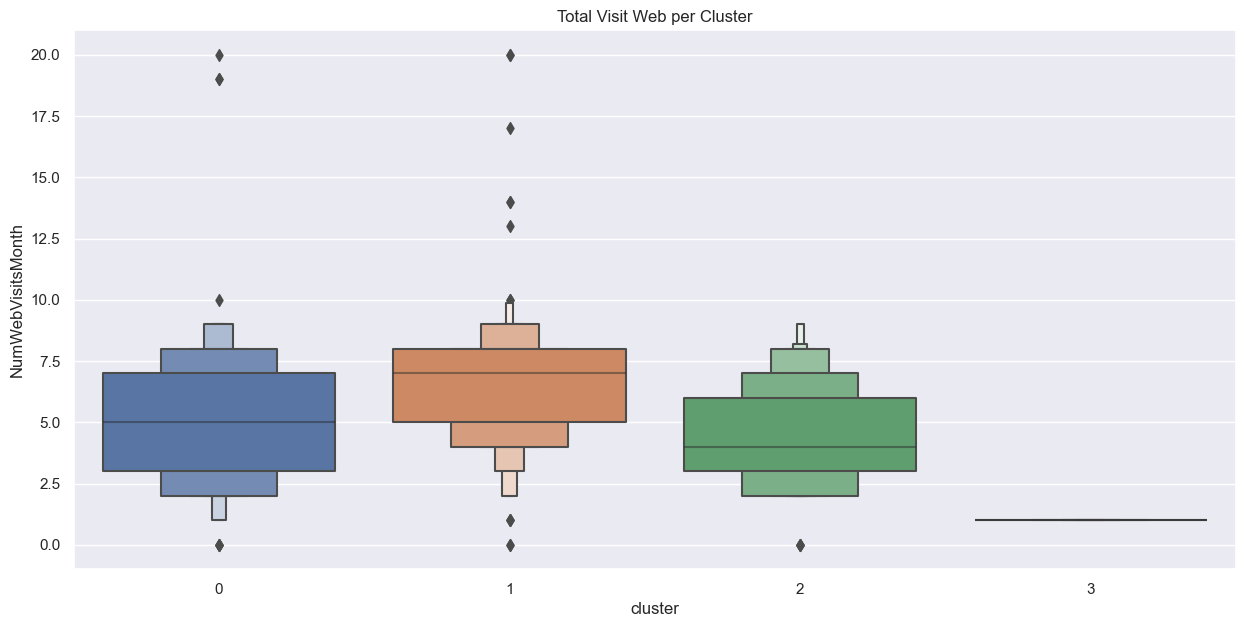

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

**Deal Purchased per Cluster**

Text(0.5, 1.0, 'Deal Puchased per Cluster')

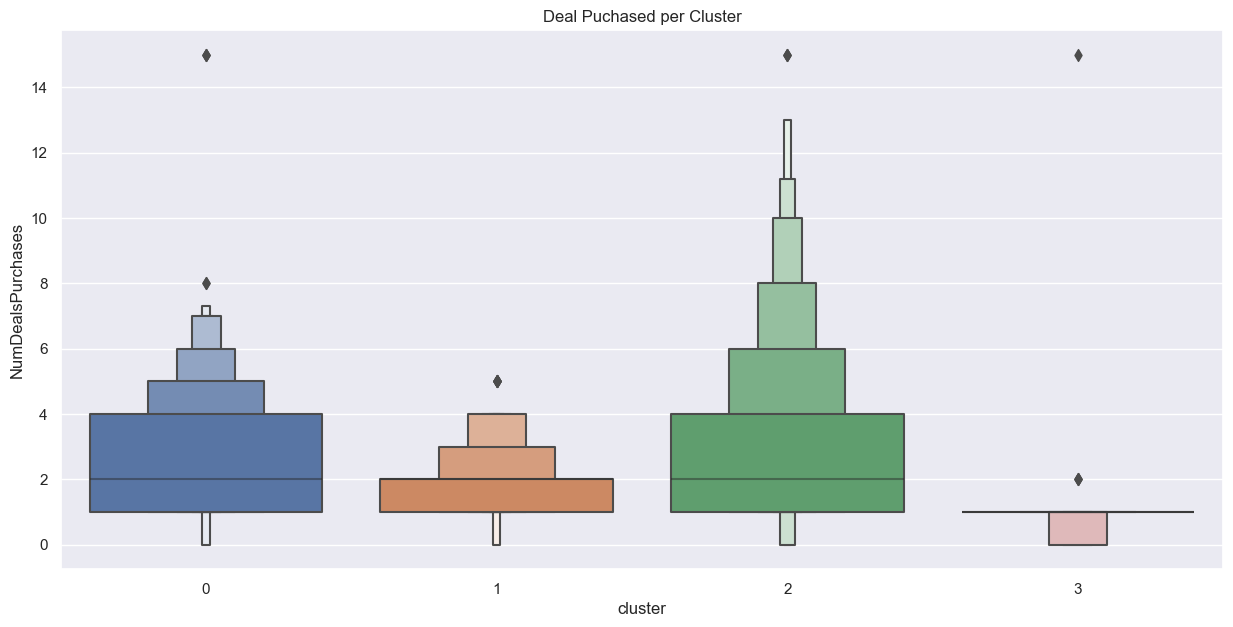

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

**CVR per Cluster**

Text(0.5, 1.0, 'CVR per Cluster')

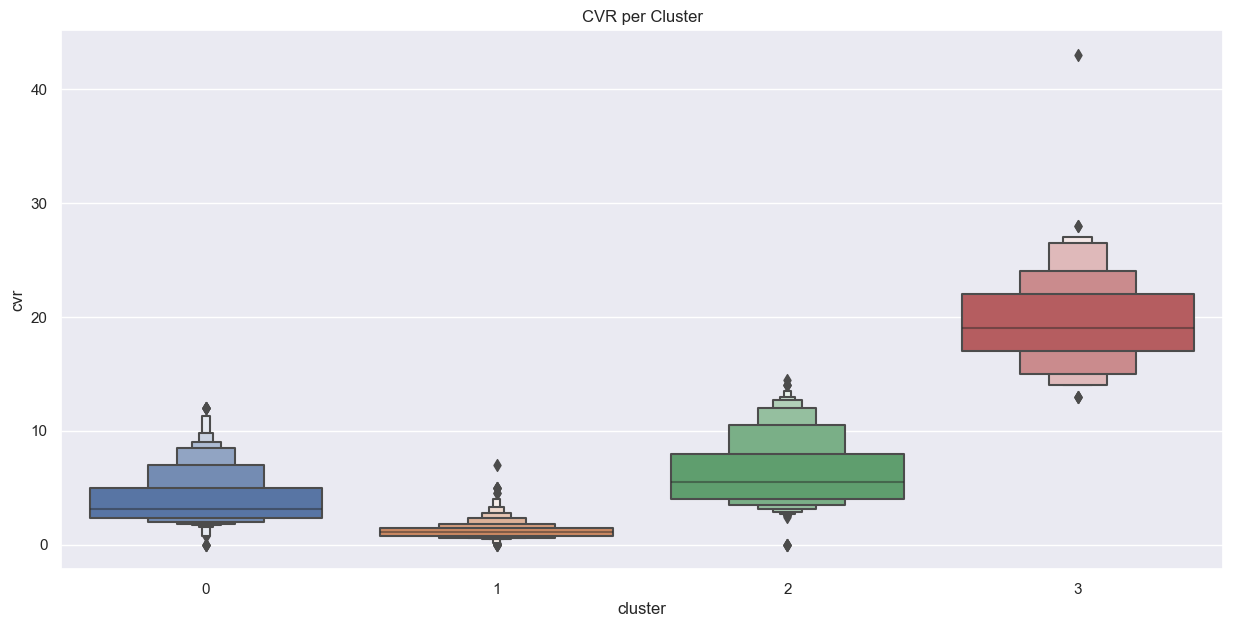

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['cvr'])
plt.title('CVR per Cluster')

**Accepted Campaign per Cluster**

Text(0.5, 1.0, 'Accepted Campaign per Cluster')

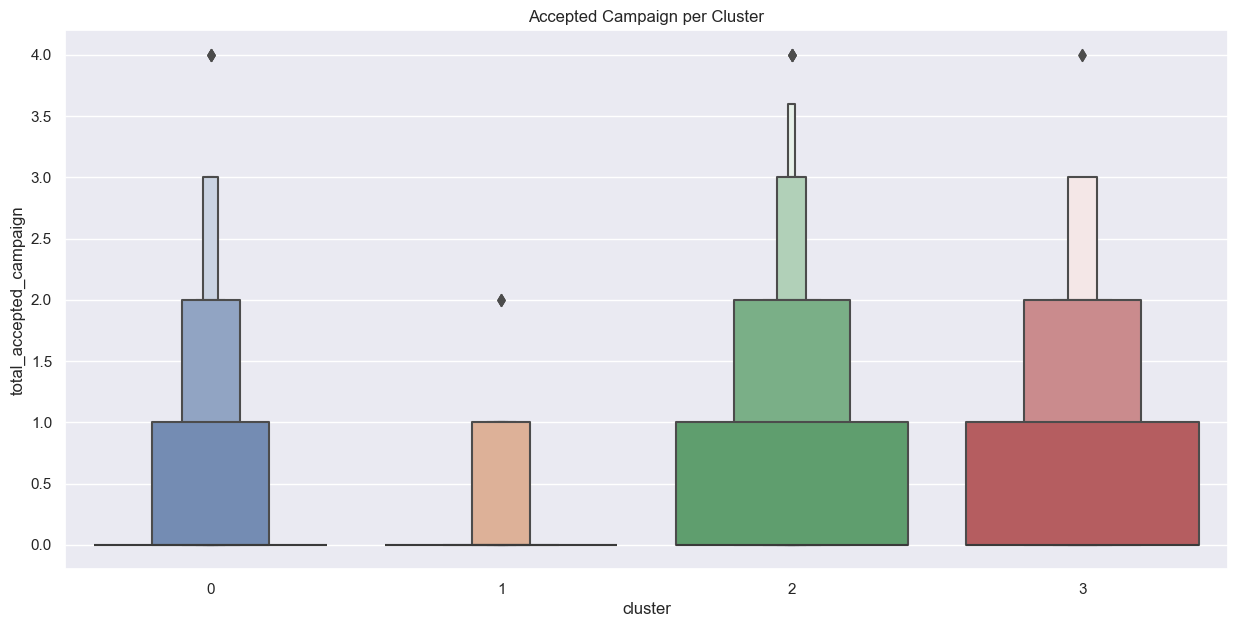

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x=data['cluster'], y=data['total_accepted_campaign'])
plt.title('Accepted Campaign per Cluster')

### **Interpretation Summary**

1. Low Spender:
- Kelompok ini didominasi oleh middle_aged_adults (36-55 tahun) dan older_adults (>55 tahun)
- Kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 57 Juta untuk total pendapatan setahun, dan IDR 506K untuk pengeluaran dalam setahun
- Kelompok ini mengeluarkan uang sebesar 506K untuk pengeluaran dalam setahun dengan rata-rata (prediksi) setiap pembelian sebesar Rp.43.176 dan dengan barang yang dibeli didominasi coke dan meat products
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 1, dengan median sebanyak 5 kali dalam sebulan, walaupun demikian, kelompok ini cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- Kelompok ini biasa disebut dengan Kelompok Mendang - Mending


2. Risk of Churn:
- Kelompok ini adalah kelompok dengan jumlah user terbesar sebanyak 900 orang yang di dominasi oleh middle_aged_adults (36-55 tahun)
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil, yang masing-masing sebesar IDR 33.4 Juta untuk total pendapatan setahun, dan IDR 57K untuk pengeluaran dalam setahun
- Kelompok ini mengeluarkan uang sebesar 57K untuk pengeluaran dalam setahun dengan rata-rata (prediksi) setiap pembelian sebesar Rp.10.708 dan dengan barang yang dibeli didominasi coke dan Fuits
- Walaupun demikian, kelompok ini adalah kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya (Conversion Rate Terendah)
- Secara campaign juga tidak banyak yang merespon dibandingkan dengan Kelompok lainnya. Mereka datang secara organic
- Kelompok ini biasa disebut dengan Kelompok Low Budget


3. Mid Spender:
- Kelompok ini didominasi oleh middle_aged_adults (36-55 tahun) dan older_adults (>55 tahun)
- Kelompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 68 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Kelompok ini mengeluarkan uang sebesar 1.1 Juta untuk pengeluaran dalam setahun dengan rata-rata (prediksi) setiap pembelian sebesar Rp.48.304 dan dengan barang yang dibeli didominasi coke dan Meat Products
- Walaupun cukup jarang untuk visit web, namun kelompok ini adalah kelompok yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan
- Kelompok ini adalah kelompok yang paling banyak merespon Campaign Marketing perusahaan.
- Kelompok ini adalah mesin uang bagi Perusahaan karena menghasilkan pendapatan terbesar bagi perusahaan


4. High Spender:
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 137 orang yang di dominasi oleh middle_aged_adults (36-55 tahun) dan older_adults (>55 tahun)
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 80 Juta untuk total pendapatan setahun, dan IDR 1.2 Juta untuk pengeluaran dalam setahun
- Kelompok ini mengeluarkan uang sebesar 1.2 Juta untuk pengeluaran dalam setahun dengan rata-rata (prediksi) setiap pembelian sebesar Rp.66.372 dan dengan barang yang dibeli didominasi coke dan Meat Products
- Kelompok ini adalah kelompok yang sangat jarang mengunjungi web dan jarang menggunakan promo namun kelompok ini adalah kelompok yang punya conversion rate terbesar untuk membeli produk. Jadi bisa dibilang Kelompok ini sekalinya mengunjungi Web langsung melakukan transaksi.


Walaupun setiap Cluster membeli barang dominan yang sama yaitu Coke dan Meat Products namun terdapat perbedaan rata-rata (prediksi) setiap pembelian, ini terjadi kemungkinan karena setiap cluster membeli coke dan Meat Product yang berbeda ukuran atau berbeda merek

### **Recommendation**

1. Untuk yang Risk of Churn bisa dicari tahu lagi kenapa mereka sering mengunjungi web namun jarang bertransaksi, apakah karena produknya kurang sesuai atau bagaimana, dan bisa juga ditambah promo agar mau membeli produk.
2. Untuk yang Low Spender, cluster ini memiliki jumlah kunjungan yang cukup baik dan sudah memakai promo namun retensi pembelian (repeat order) bisa ditingkatkan lagi, mungkin dengan promo lebih banyak.
3. Untuk yang Mid Spender, tetap pertahankan performa penjualan yang baik.
4. Untuk yang High Spender, bisa ditawari kategori barang yang lebih mahal seperti kategori Emas untuk mendulang lebih banyak pendapatan bagi perusahaan.

### **Potential Impact**

Jika kita fokus pada Kelompok High Spender dan menawarkan mereka lebih sering untuk kategori produk Emas maka kita akan mengalami kenaikan pendapatan

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_at_age,age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped,cluster,cluster_mapped
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,65,0,0,older_adults,1617000,0,25,3.571429,2,2,Mid Spender
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,68,2,1,older_adults,27000,0,6,1.200000,2,1,Risk of Churn
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,57,0,0,older_adults,776000,0,21,5.250000,2,2,Mid Spender
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,38,1,1,middled_aged_adults,53000,0,8,1.333333,2,1,Risk of Churn
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,41,1,1,middled_aged_adults,422000,0,19,3.800000,4,0,Low Spender


**Pendapatan Emas untuk Cluster 3**

In [ ]:
data[data.cluster == 3].MntGoldProds.sum()

11221000

Rp.11.221.000

**Pendapatan Emas jika terjadi penambahan 50% kenaikan penjualan**

In [ ]:
(data[data.cluster == 3].MntGoldProds.sum() * 0.5) + (data[data.cluster == 3].MntGoldProds.sum())

16831500.0

Rp.16.831.500

Kesimpulannya adalah jika **Berhasil dilakukan Marketing Retargeting** dan diasumsikan setiap customer mengalami peningkatan spending minimal 50% dari periode sebelumnya maka total spending cluster-3 untuk kategori EMAS akan meningkat sebesar Rp.16.831.500 dari sebelumnya sebesar Rp.11.221.000